In [80]:
#%pip install matplotlib pandas numpy seaborn wordcloud

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
badoo = pd.read_excel('Data/badoo.xlsx',parse_dates=False)

In [83]:
badoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         100 non-null    int64         
 1   text            100 non-null    object        
 2   post_text       100 non-null    object        
 3   shared_text     66 non-null     object        
 4   time            100 non-null    datetime64[ns]
 5   timestamp       100 non-null    int64         
 6   likes           100 non-null    int64         
 7   comments        100 non-null    int64         
 8   shares          100 non-null    int64         
 9   post_url        100 non-null    object        
 10  comments_full   100 non-null    object        
 11  reactors        100 non-null    object        
 12  reactions       100 non-null    object        
 13  reaction_count  100 non-null    int64         
 14  fetched_time    100 non-null    datetime64[ns]
dtypes: date

Làm sạch dữ liệu

In [84]:
badoo[["text", "post_text", "shared_text", "post_url", "comments_full", "reactors", "reactions"]] = badoo[["text", "post_text", "shared_text", "post_url", "comments_full", "reactors", "reactions"]].astype(pd.StringDtype())

In [85]:
badoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   post_id         100 non-null    int64         
 1   text            100 non-null    string        
 2   post_text       100 non-null    string        
 3   shared_text     66 non-null     string        
 4   time            100 non-null    datetime64[ns]
 5   timestamp       100 non-null    int64         
 6   likes           100 non-null    int64         
 7   comments        100 non-null    int64         
 8   shares          100 non-null    int64         
 9   post_url        100 non-null    string        
 10  comments_full   100 non-null    string        
 11  reactors        100 non-null    string        
 12  reactions       100 non-null    string        
 13  reaction_count  100 non-null    int64         
 14  fetched_time    100 non-null    datetime64[ns]
dtypes: date

In [86]:
badoo.duplicated().sum()


0

In [87]:
badoo.isnull().sum()

post_id            0
text               0
post_text          0
shared_text       34
time               0
timestamp          0
likes              0
comments           0
shares             0
post_url           0
comments_full      0
reactors           0
reactions          0
reaction_count     0
fetched_time       0
dtype: int64

In [88]:
badoo["text"] = badoo['text'].fillna("0")
badoo['post_text'] = badoo['post_text'].fillna("0")
badoo["shared_text"]= badoo['shared_text'].fillna("0")
badoo.isnull().sum()


post_id           0
text              0
post_text         0
shared_text       0
time              0
timestamp         0
likes             0
comments          0
shares            0
post_url          0
comments_full     0
reactors          0
reactions         0
reaction_count    0
fetched_time      0
dtype: int64

Data Analysis & Visualization


In [89]:
badoo.describe()

,post_id,timestamp,likes,comments,shares,reaction_count
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.00000,100.000000
mean,2.390530e+15,1.691981e+09,210.900000,93.760000,4.04000,224.490000
std,2.748345e+15,5.742352e+06,71.740202,50.365958,2.29589,77.907676
min,6.372142e+14,1.681463e+09,26.000000,12.000000,0.00000,26.000000
25%,6.748753e+14,1.686883e+09,159.750000,55.750000,2.00000,167.500000
50%,7.040141e+14,1.692492e+09,203.000000,82.000000,4.00000,215.500000
75%,6.673563e+15,1.697245e+09,264.500000,121.500000,5.25000,277.000000
max,6.893614e+15,1.700676e+09,409.000000,251.000000,10.00000,442.000000


In [133]:
badoo["sum_reaction"] = badoo['reaction_count'] + badoo['comments'] + badoo["shares"]
badoo['sum_reaction']

0      45
1      95
2     173
3     287
4     236
     ... 
95    247
96    277
97    211
98    335
99    237
Name: sum_reaction, Length: 100, dtype: int64

In [90]:
badoo

,post_id,text,post_text,shared_text,time,timestamp,likes,comments,shares,post_url,comments_full,reactors,reactions,reaction_count,fetched_time
0,723081719862329,Let's wave goodbye to negative dating trends. ...,Let's wave goodbye to negative dating trends. ...,0,2023-11-23 01:01:21,1700676081,26,12,7,https://facebook.com/badoo/posts/723081719862329,"[{'comment_id': '2103283900030742', 'comment_u...",[],{'like': 26},26,2023-11-23 22:39:48.332
1,722069789963522,Lloyd Harvey Hulme gives us his top tips for b...,Lloyd Harvey Hulme gives us his top tips for b...,0,2023-11-21 02:22:46,1700508166,62,23,2,https://facebook.com/badoo/posts/722069789963522,"[{'comment_id': '358298663403972', 'comment_ur...","[{'name': 'Maria Moore', 'link': 'https://face...","{'like': 62, 'love': 5, 'haha': 2, 'wow': 1}",70,2023-11-23 22:39:54.111
2,720434093460425,Entering our ✨confidence✨ era! What is your go...,Entering our ✨confidence✨ era! What is your go...,BADOO.COM How To Boost Your Dating Confidence,2023-11-18 02:00:47,1700247647,120,48,2,https://facebook.com/badoo/posts/720434093460425,"[{'comment_id': '1716020972231783', 'comment_u...","[{'name': 'Maria Moore', 'link': 'https://face...","{'like': 120, 'love': 2, 'wow': 1}",123,2023-11-23 22:40:07.204
3,719869450183556,13 years later and Sevda's Badoo love story is...,13 years later and Sevda's Badoo love story is...,0,2023-11-17 03:01:31,1700164891,178,80,7,https://facebook.com/badoo/posts/719869450183556,"[{'comment_id': '301469116053023', 'comment_ur...","[{'name': 'Vasile Mihalcea', 'link': 'https://...","{'like': 178, 'love': 15, 'haha': 1, 'wow': 4,...",200,2023-11-23 22:40:30.934
4,718781613625673,"Notice something new? 👀 Yep, that's right, we'...","Notice something new? 👀 Yep, that's right, we'...",0,2023-11-15 01:35:14,1699986914,133,90,5,https://facebook.com/badoo/posts/718781613625673,"[{'comment_id': '622134516778891', 'comment_ur...","[{'name': 'Лида Лебедевп', 'link': 'https://fa...","{'like': 133, 'love': 4, 'haha': 2, 'care': 1,...",141,2023-11-23 22:40:49.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6687087807981631,6 Green Flags That Signify A Healthy Relations...,6 Green Flags That Signify A Healthy Relations...,BADOO.COM 6 Green Flags That Signify A Healthy...,2023-04-24 16:01:30,1682326890,193,50,1,https://facebook.com/badoo/posts/6687087807981631,"[{'comment_id': '168379842491947', 'comment_ur...","[{'name': 'Sara Kingston', 'link': 'https://fa...","{'like': 193, 'love': 3}",196,2023-11-23 23:27:39.692
96,6677694868920925,A Guide To Consensual Sexting https://badoo.co...,A Guide To Consensual Sexting https://badoo.co...,BADOO.COM A Guide To Consensual Sexting,2023-04-21 16:01:11,1682067671,190,65,5,https://facebook.com/badoo/posts/6677694868920925,"[{'comment_id': '610801090672313', 'comment_ur...","[{'name': 'Sara Kingston', 'link': 'https://fa...","{'like': 190, 'love': 11, 'haha': 1, 'care': 4...",207,2023-11-23 23:27:49.692
97,6672186142805131,What's Your Apology Language? https://badoo.co...,What's Your Apology Language? https://badoo.co...,BADOO.COM What's Your Apology Language?,2023-04-19 22:01:50,1681916510,147,49,1,https://facebook.com/badoo/posts/6672186142805131,"[{'comment_id': '793313435698030', 'comment_ur...","[{'name': 'เกตุทิพ สุหร่าย', 'link': 'https://...","{'like': 147, 'love': 11, 'care': 3}",161,2023-11-23 23:28:12.555
98,6654541117902967,Should You Ever Tell A Friend Their Partner Is...,Should You Ever Tell A Friend Their Partner Is...,BADOO.COM Should You Ever Tell A Friend Their ...,2023-04-14 16:01:02,1681462862,203,123,2,https://facebook.com/badoo/posts/6654541117902967,"[{'comment_id': '1020881068875633', 'comment_u...","[{'name': 'Sara Kingston', 'link': 'https://fa...","{'like': 203, 'love': 7}",210,2023-11-23 23:28:29.442


In [91]:
first_row = badoo.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

{'like': 26, 'shares': 7, 'comments': 12}

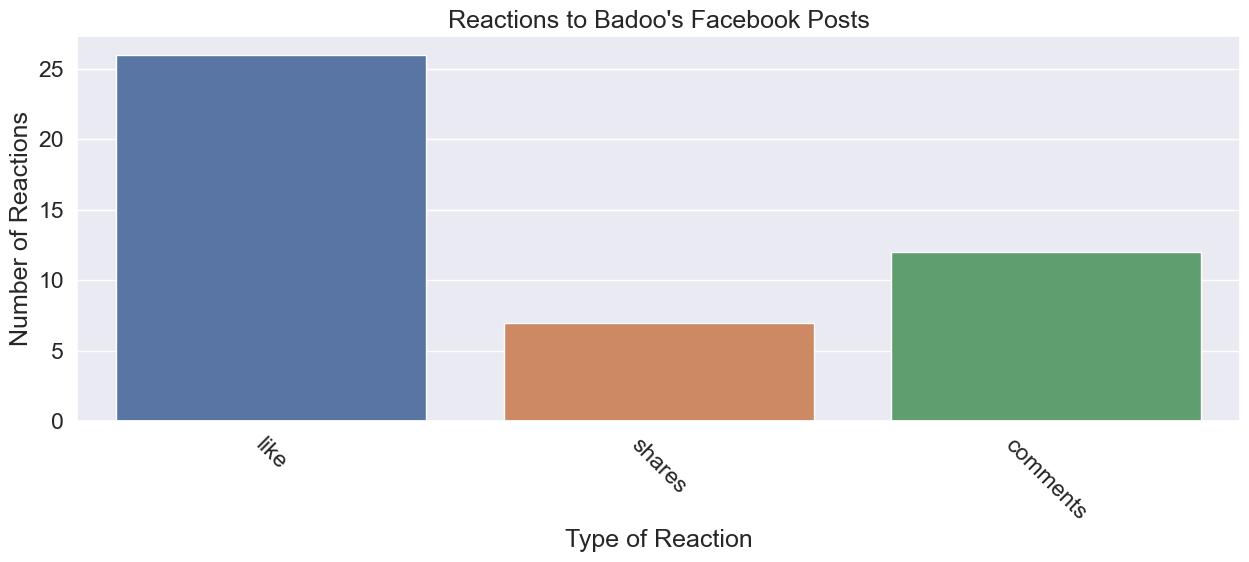

In [134]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Badoo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

In [135]:
df_text = badoo[['post_text']]
text    = str(df_text['post_text'])

text

"0     Let's wave goodbye to negative dating trends. ...\n1     Lloyd Harvey Hulme gives us his top tips for b...\n2     Entering our ✨confidence✨ era! What is your go...\n3     13 years later and Sevda's Badoo love story is...\n4     Notice something new? 👀 Yep, that's right, we'...\n                            ...                        \n95    6 Green Flags That Signify A Healthy Relations...\n96    A Guide To Consensual Sexting https://badoo.co...\n97    What's Your Apology Language? https://badoo.co...\n98    Should You Ever Tell A Friend Their Partner Is...\n99    How To Start Dating Again if It’s Been a While...\nName: post_text, Length: 100, dtype: string"

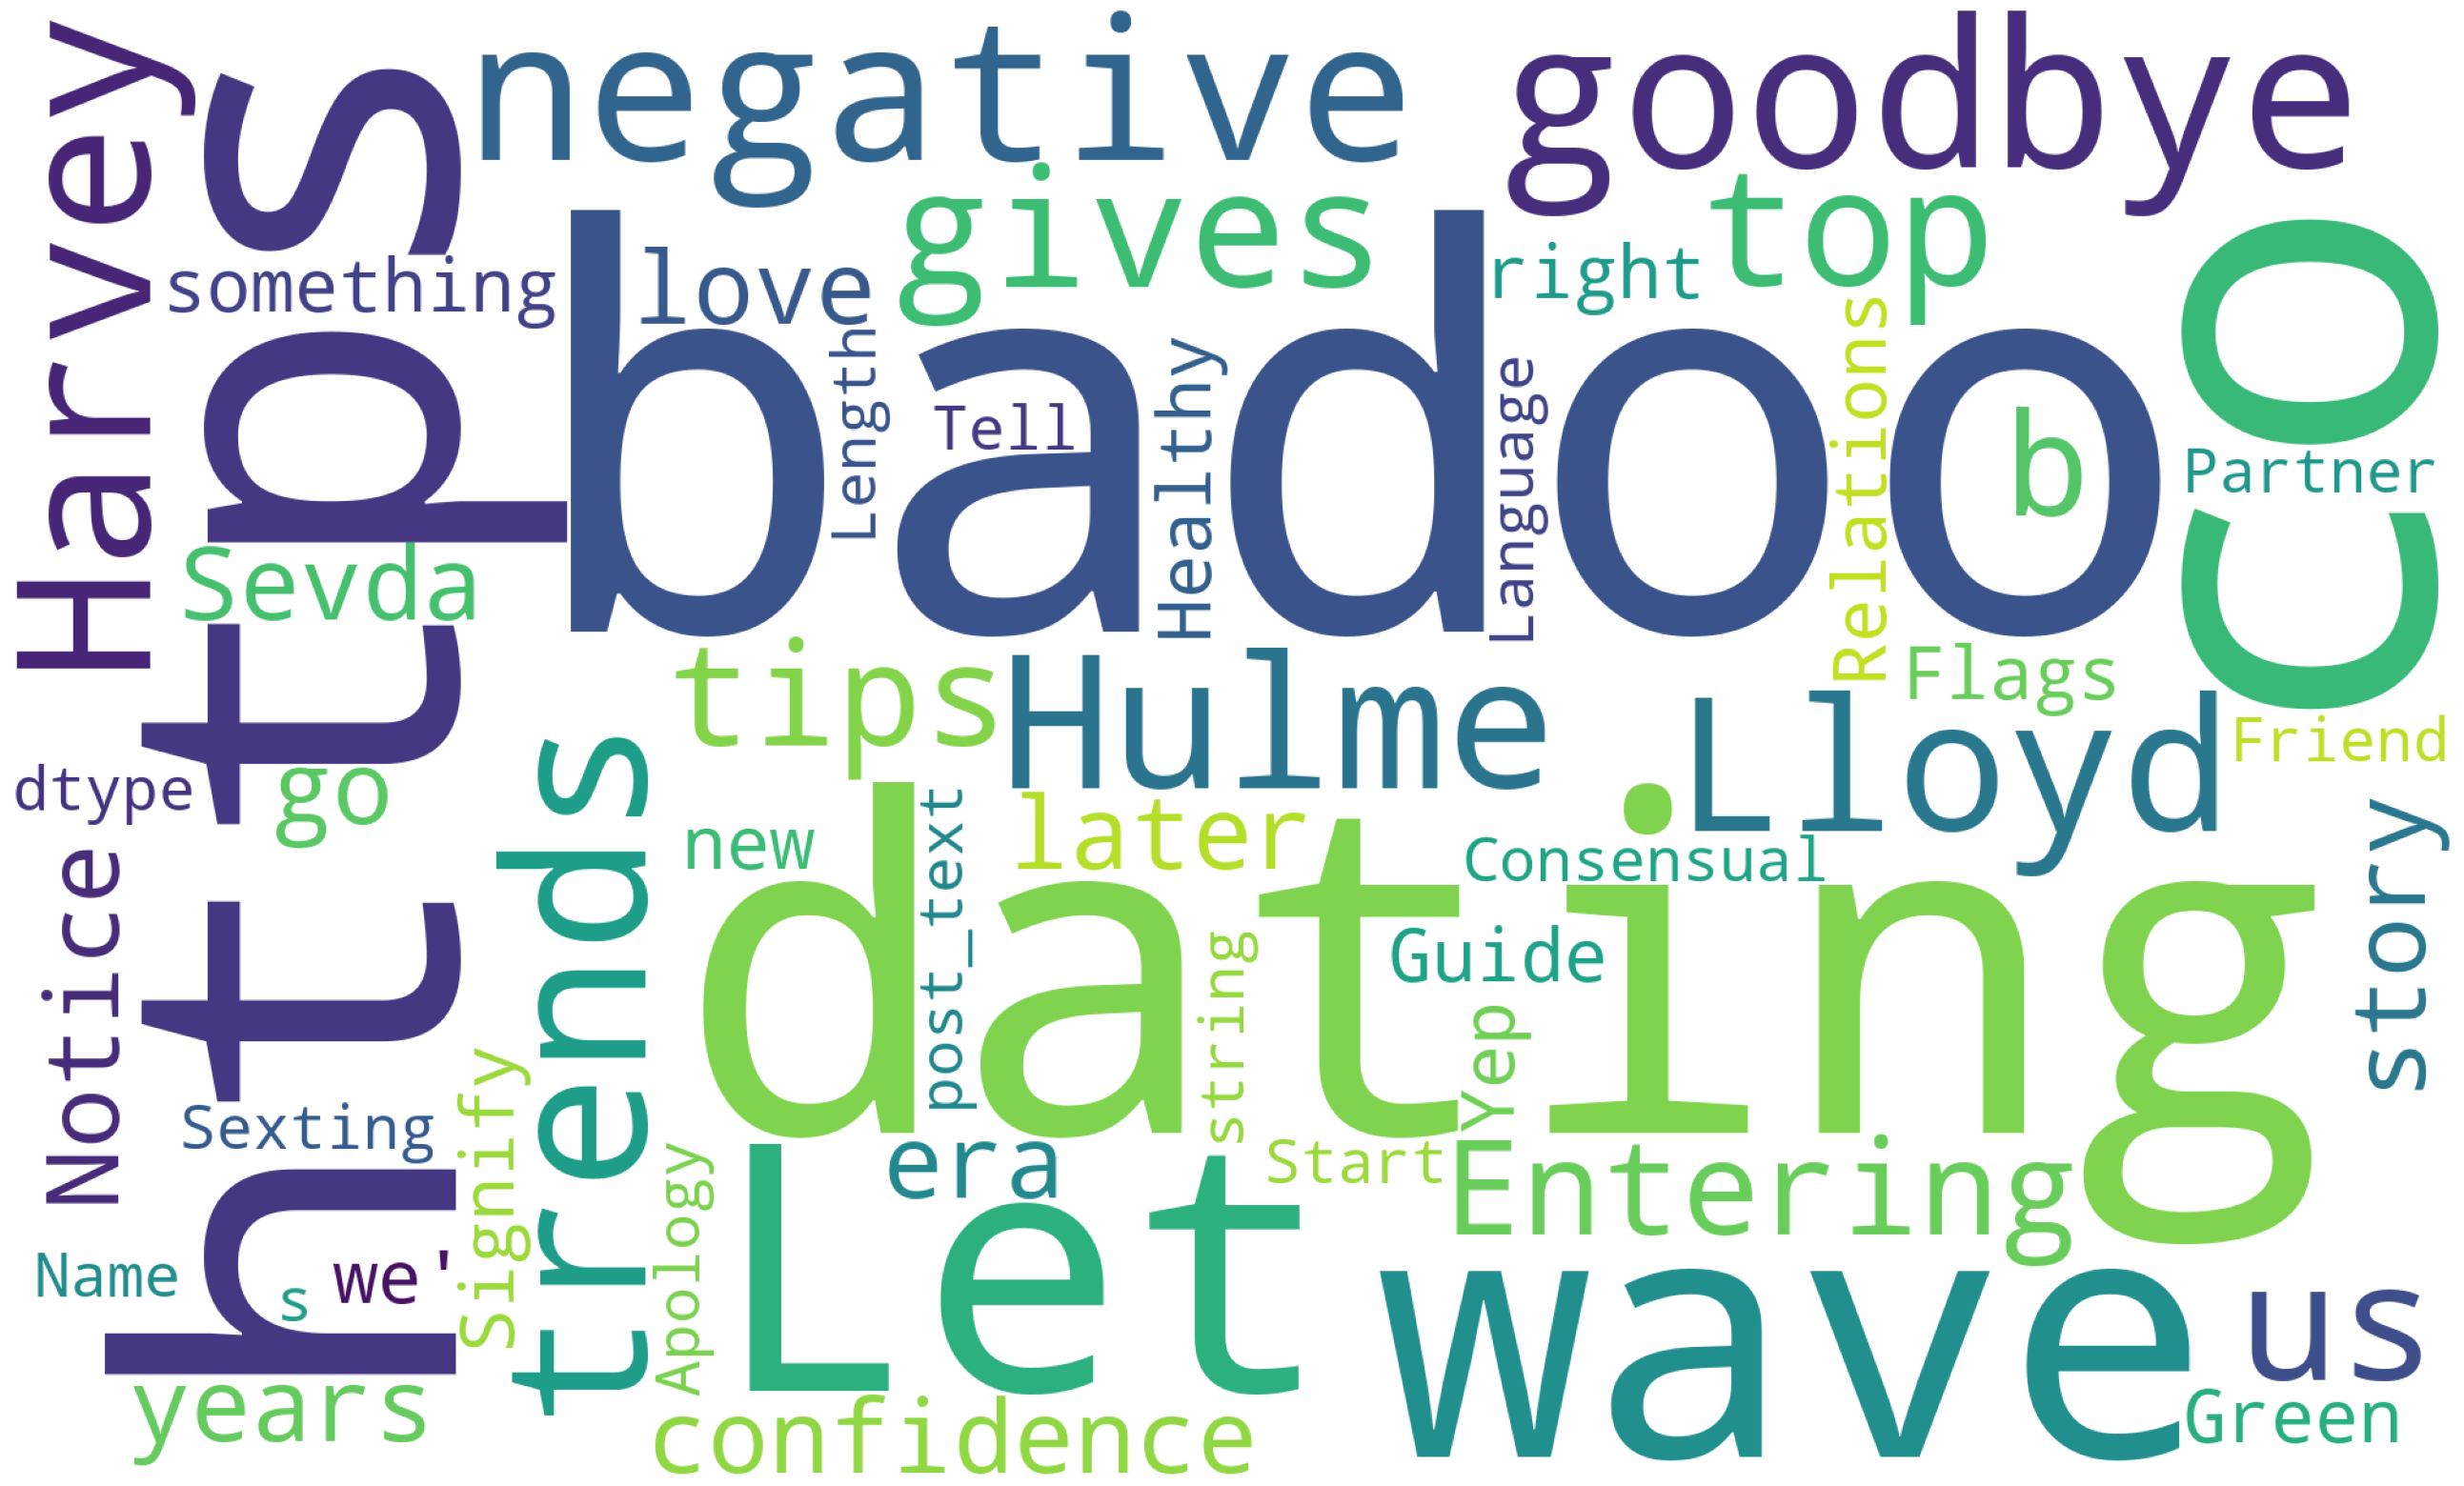

In [94]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [95]:

badoo['reactions'][0]


"{'like': 26}"

Biểu đồ thể hiện mối tương quan giữa giá trị reaction trung bình và các giá trị reactions trong từng post.

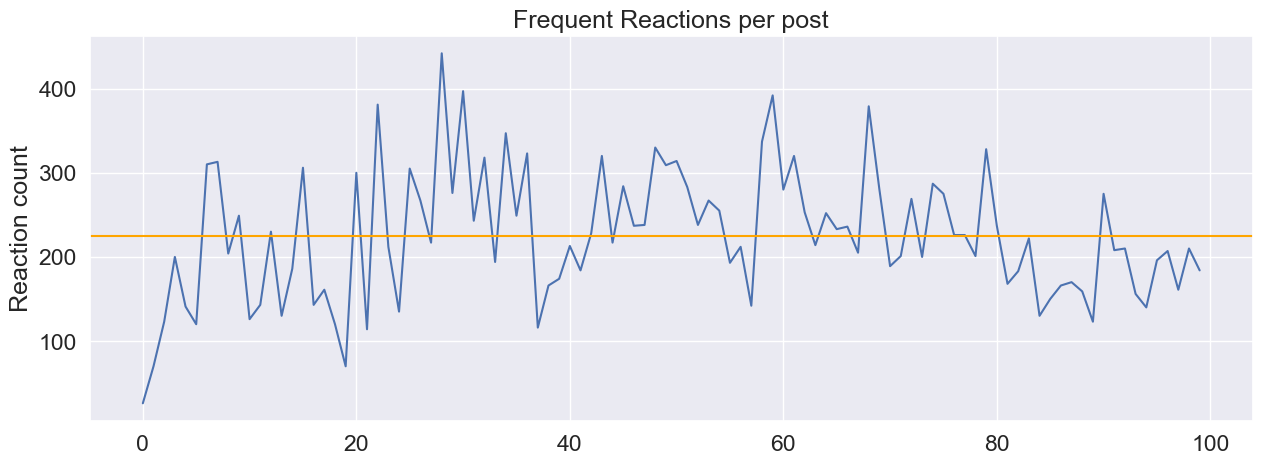

In [96]:
reactions_count = badoo[['reaction_count']]
plt.plot(reactions_count['reaction_count'])
plt.axhline(reactions_count['reaction_count'].mean(),color='orange')
plt.ylabel("Reaction count")
plt.title("Frequent Reactions per post")
plt.savefig("fre_reaction.png")
plt.show()


In [122]:
idxmax = reactions_count.idxmax()
idxmax

reaction_count    28
dtype: int64

In [126]:
import ast
first_row = badoo.iloc[reactions_count.idxmax()]
reactions = ast.literal_eval(first_row['reactions'])
reactions = pd.DataFrame(reactions)
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


28    {'like': 409, 'love': 27, 'wow': 2, 'care': 2,...
Name: reactions, dtype: string

Biểu đồ số bài đăng từ tháng 5 đến tháng 10.

<Axes: title={'center': 'frequent post of hour'}, xlabel='hour', ylabel='Post count'>

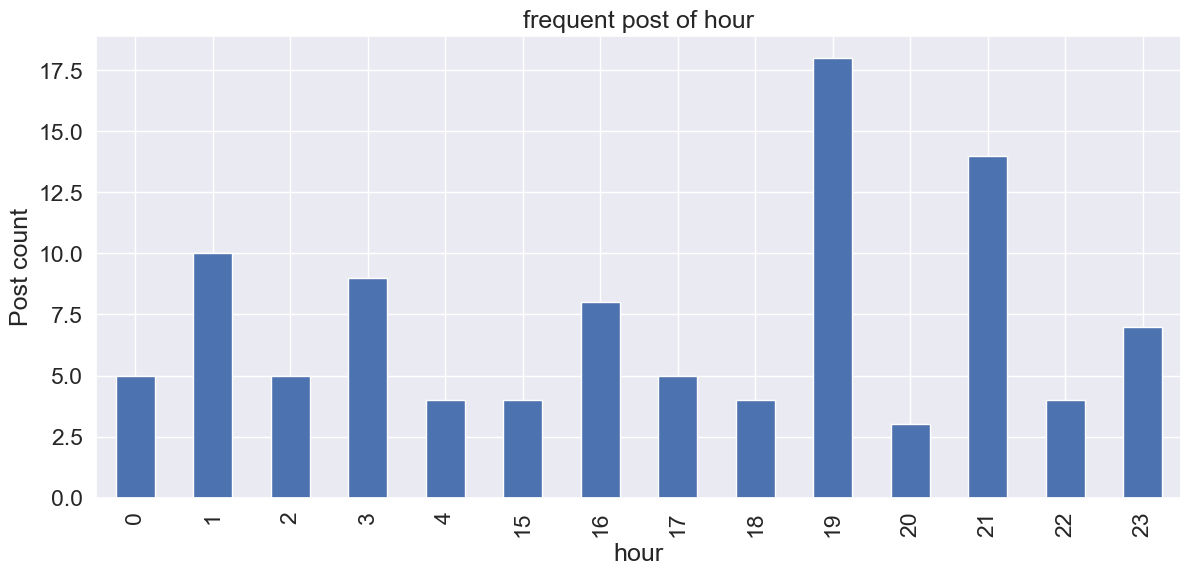

In [117]:
time_up_post = pd.to_datetime(badoo['time']).dt.hour.value_counts()
time_up_post.sort_index().plot(kind='bar',figsize=[14,6],xlabel='hour', ylabel='Post count',title="frequent post of hour")


In [138]:
import ast
reactor = badoo['reactors'][1]
reactor = reactor.replace("'","\"")
reactor = ast.literal_eval(reactor)
reactor = pd.DataFrame(reactor)
reactor



,name,link,type
0,Maria Moore,https://facebook.com/profile.php?id=1000946346...,like
1,Ayoluwa Sola,https://facebook.com/profile.php?id=1000944665...,like
2,Lorene Wolf,https://facebook.com/profile.php?id=1000943511...,like
3,Helen Margret,https://facebook.com/profile.php?id=1000937449...,like
4,Monica Guinn,https://facebook.com/profile.php?id=1000935488...,like
...,...,...,...
65,Ibrahim Sevgin,https://facebook.com/profile.php?id=6155089465...,like
66,Leowa Zeeob,https://facebook.com/profile.php?id=6155051853...,like
67,Gérard Steve,https://facebook.com/profile.php?id=6155051602...,like
68,Yasmine Anyla,https://facebook.com/profile.php?id=6155010066...,love


In [139]:
reactor

,name,link,type
0,Maria Moore,https://facebook.com/profile.php?id=1000946346...,like
1,Ayoluwa Sola,https://facebook.com/profile.php?id=1000944665...,like
2,Lorene Wolf,https://facebook.com/profile.php?id=1000943511...,like
3,Helen Margret,https://facebook.com/profile.php?id=1000937449...,like
4,Monica Guinn,https://facebook.com/profile.php?id=1000935488...,like
...,...,...,...
65,Ibrahim Sevgin,https://facebook.com/profile.php?id=6155089465...,like
66,Leowa Zeeob,https://facebook.com/profile.php?id=6155051853...,like
67,Gérard Steve,https://facebook.com/profile.php?id=6155051602...,like
68,Yasmine Anyla,https://facebook.com/profile.php?id=6155010066...,love
